In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Overfitting

We have seen how to train basic models and how backpropagation is the backbone of any neural network.

Overfitting refers to the phenomenon where a neural network models the training data very well but fails when it sees new data from the same problem domain. Overfitting is caused by noise in the training data that the neural network picks up during training and learns it as an underlying concept of the data.

For example in the given image, if we want to fit a function to the scatter points, the blue curve is able to generalize and give us a function that would fit best for any other testing example. Whereas the curve in red "memorizes" the points and gives us a function that fails to generalize to the underlying function. For some test examples, it would give a very high error.

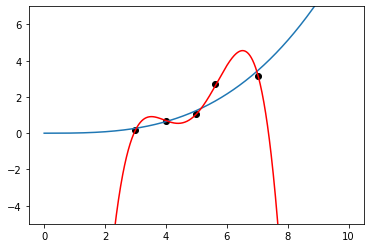

The model in red learns the noise instead of the underlying structure.
Models might overfit because because they are too complex. A model which is only able to generalize to quadradic functions provides us with better results than a model which is able to generalize to quartic functions.

New arbitrary samples generated with the true function would have a high distance to the fit of the model. We also say that the model has a high variance.

## Regularization

Regularization refers to a set of different techniques that lower the complexity of a neural network model during training, and thus prevent the overfitting. Imagine a model being a chain of cranes. The bigger and more number of cranes, the more complex movements it can perform. This can cause the system to be way too complex for simpler tasks. By restricting the size of the coefficients, we reduce the complexity of the model. Intuitively, you can think of restricting a layer in the model like restricting the movement of 1 crane, the model is not able to perform more complex movements as before.
Today we will look at 3 regularization techniques.

### Norm
L1 and L2 regularisation owes its name to L1 and L2 norm of a vector w respectively. Here’s a primer on norms:

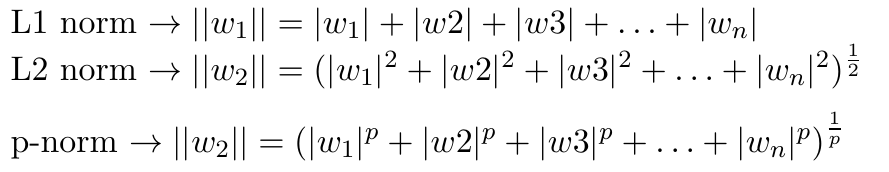


### L1 regularization

L1 regularization adds an L1 norm that is equal to the absolute value of the magnitude of coefficient, or simply restricting the size of coefficients. 

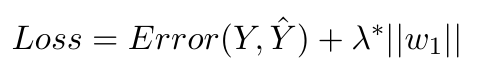
 
This increases the loss for high values of weights, in-turn making sure that the magnitude of the weights is reduced in the backpropagation step. Here 𝝺 is called the regularization parameter and 𝝺> 0. It is a hyperparameter we can use to control the complexity of the model.

       

### L2 regularization

L2 regularization is quite similar to L1 regularization, but instead of L1 nor,, we add the L2 norm to the loss

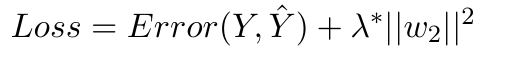

Here 𝝺 is again a hyperparameter we can tune.

#### Maths behind L1 and L2

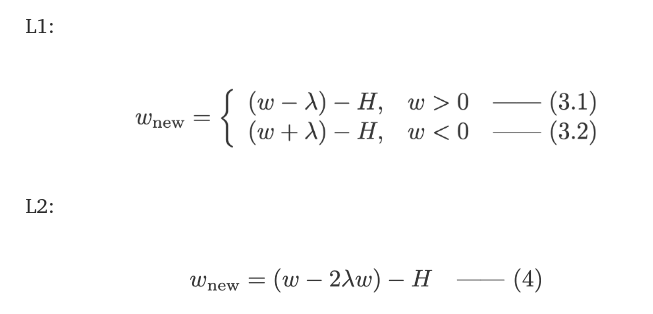

## Difference between L1 and L2 loss

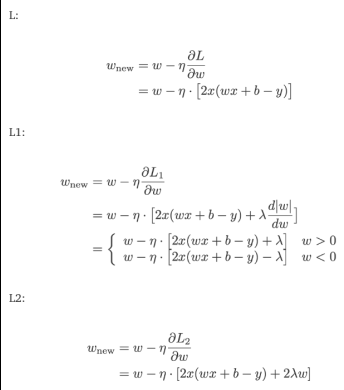

Compare the second term of each of the equation above. Apart from H, the change in w depends on the ±λ term or the -2λw term, which highlight the influence of the following:

    1.) sign of current w (L1, L2)
    2.) magnitude of current w (L2)
    3.) doubling of the regularisation parameter (L2)
While weight updates using L1 are influenced by the first point, weight updates from L2 are influenced by all the three points.


If you are looking for resources regarding L1 and L2 regularization:
       
https://medium.com/analytics-vidhya/l1-vs-l2-regularization-which-is-better-d01068e6658c

https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning

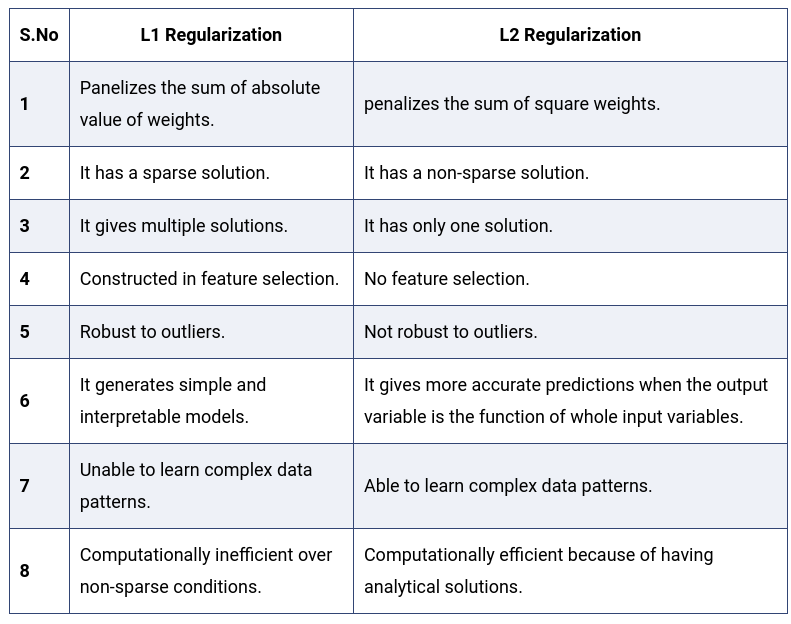


1.) Where L1 regularization attempts to estimate the median of data, L2 regularization makes estimation for the mean of the data in order to evade overfitting.

2.) Through including the absolute value of weight parameters, L1 regularization can add the penalty term in cost function. On the other hand, L2 regularization appends the squared value of weights in the cost function.

3.) As defined, sparsity is the characteristic of holding highly significant coefficients, either very close to zero or not very close to zero, where in general coefficients approaching zero would be eliminated later. 

And the feature selection is the in-depth of sparsity, i.e. in place of confining coefficients nearby to zero, feature selection is brought them exactly to zero, and hence expel certain features from the data model. 

 

In this context, L1 regularization can be helpful in features selection by eradicating the unimportant features, whereas, L2 regularization is not recommended for feature selection.

### Dropout
Dropout is another regularization practice. During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

This also acts like reducing the model complexity by having lesser number of nodes during training. You can also think of it finding "different paths" through the network.

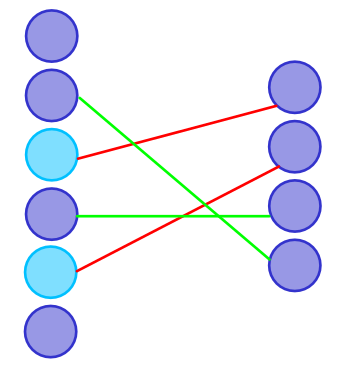

For each dropout layer in every iteration, we may choose to drop p% of nodes. Here p is another hyperparameter we can tune.


## Exploding and Vanishing Gradients 
When training a deep neural network with gradient based learning and backpropagation, we find the partial derivatives by traversing the network from the the final layer (Ŷ) to the initial layer. Using the chain rule, layers that are deeper into the network go through continuous matrix multiplications in order to compute their derivatives.

In a network of n hidden layers, n derivatives will be multiplied together. If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient. Alternatively, if the derivatives are small then the gradient will decrease exponentially as we propagate through the model until it eventually vanishes, and this is the vanishing gradient problem.

In the case of exploding gradients, the accumulation of large derivatives results in the model being very unstable and incapable of effective learning, The large changes in the models weights creates a very unstable network, which at extreme values the weights become so large that is causes overflow resulting in NaN weight values of which can no longer be updated. On the other hand, the accumulation of small gradients results in a model that is incapable of learning meaningful insights since the weights and biases of the initial layers, which tends to learn the core features from the input data (X), will not be updated effectively. In the worst case scenario the gradient will be 0 which in turn will stop the network will stop further training.


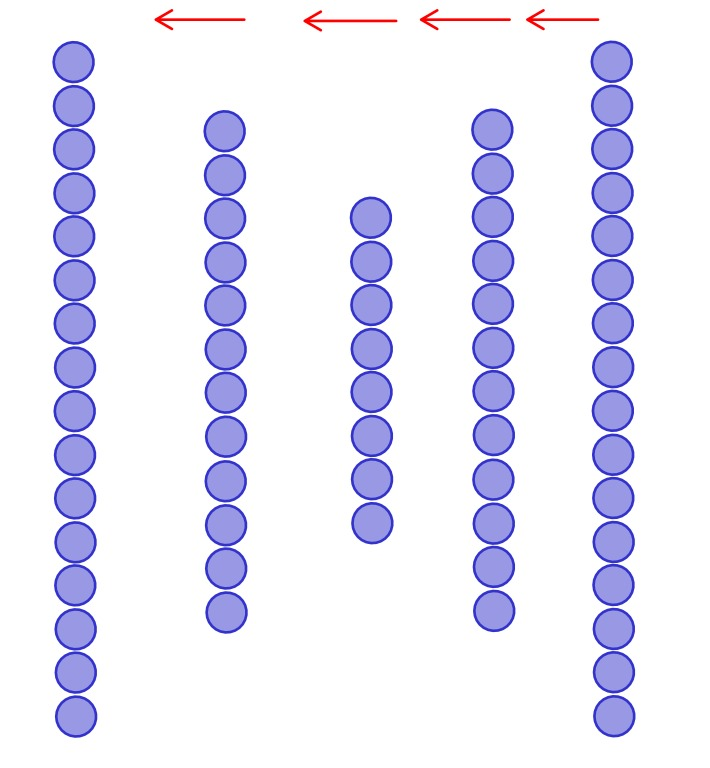




Exploding gradients are caused by having high value of learning rate, whereas vanishing gradients can be caused by having a very high regularizing term, a very deep model, or a very low learning rate.
\
\
You can spot exploding gradients when: 

    1.) The model is not learning much on the training data therefore resulting in a poor loss.
    2.) The model will have large changes in loss on each update due to the models instability.
    3.) The models loss will be NaN during training.
    4.) Model weights grow exponentially and become very large when training the model.
\
\
You can spot vanishing gradients when:

    1.) The model will improve very slowly during the training phase and it is also possible that training stops entirely.
    2.) The weights closer to the output layer of the model would witness more of a change whereas the layers that occur 
        closer to the input layer would not change much
    3.) Model weights shrink exponentially and become very small when training the model.
    4.) The model weights become 0 in the training phase.



#### How to fix exploding and vanishing gradients

Vanishing Gradients - 

    1.) You can try increasing the learning rate.
    2.) Try reducing the regularizing term.
    3.) Make the model less deep
    
\
Exploding gradients - 


    1.) Try reducing the learning rate.
    2.) Increase the regularization.
    3.) Gradient clipping, where you clip the gradients if they cross a certain threshold.

## Momentum

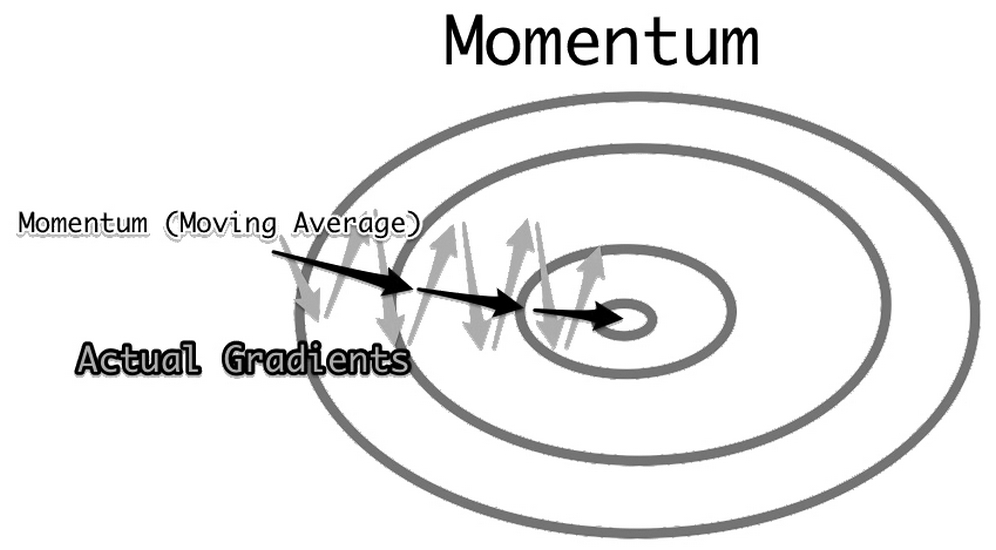

It may be the case that the gradients end up zig-zagging a lot while training. Though this might work to reach the minima, it is inefficient and ends up wasting a lot of compute. To tackle this, we use a technique called momentum, it keeps a track of the moving average value of the gradients. This helps increase both speed, and accuracy of the model.

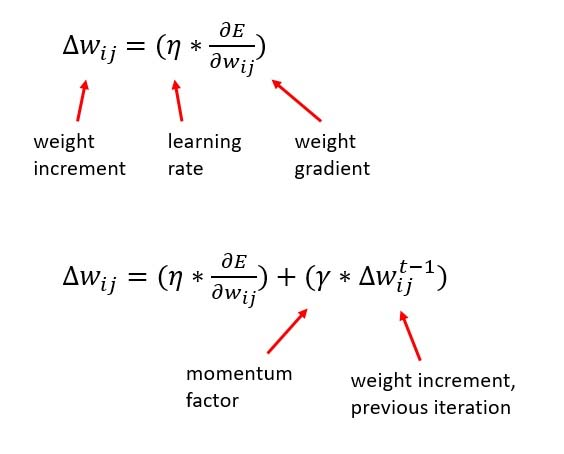

This also helps the model work when the loss is at a saddle point/ plateau.

Momentum Illustration: https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

In [ ]:
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

170508288/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


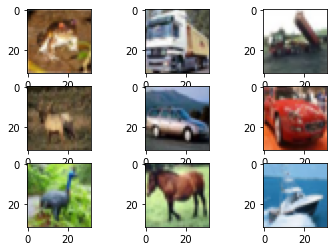

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [ ]:
y_train = tf.keras.utils.to_categorical(Y_train)
y_test = tf.keras.utils.to_categorical(Y_test)
print(y_train.shape)
print(y_test.shape)
x_train = X_train/255.
x_test = X_test/255.
print(x_train.shape)
print(x_test.shape)

(50000, 10)
(10000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model_old = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu),
                             tf.keras.layers.Dense(16, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation='softmax')
])
model_old.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_old.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)        

In [ ]:
history_old = model_old.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/100
196/196 [==============================] - 41s 44ms/step - loss: 2.3020 - accuracy: 0.1188 - val_loss: 2.3011 - val_accuracy: 0.1357
Epoch 2/100
196/196 [==============================] - 8s 40ms/step - loss: 2.2997 - accuracy: 0.1442 - val_loss: 2.2978 - val_accuracy: 0.1376
Epoch 3/100
196/196 [==============================] - 8s 40ms/step - loss: 2.2948 - accuracy: 0.1402 - val_loss: 2.2903 - val_accuracy: 0.1366
Epoch 4/100
196/196 [==============================] - 8s 40ms/step - loss: 2.2809 - accuracy: 0.1372 - val_loss: 2.2710 - val_accuracy: 0.1371
Epoch 5/100
196/196 [==============================] - 8s 39ms/step - loss: 2.2357 - accuracy: 0.1453 - val_loss: 2.1795 - val_accuracy: 0.1786
Epoch 6/100
196/196 [==============================] - 8s 40ms/step - loss: 2.1655 - accuracy: 0.1830 - val_loss: 2.1920 - val_accuracy: 0.1871
Epoch 7/100
196/196 [==============================] - 8s 39ms/step - loss: 2.0977 - accuracy: 0.2089 - val_loss: 2.0877 - val_accuracy

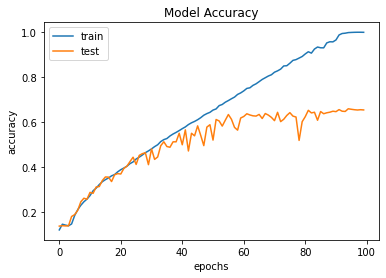

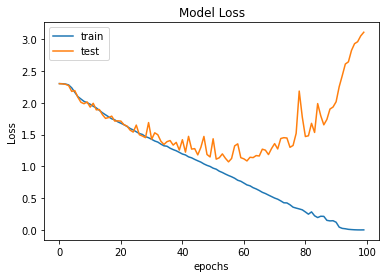

In [ ]:
plt.plot(history_old.history['accuracy'])
plt.plot(history_old.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_old.history['loss'])
plt.plot(history_old.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                             tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                             tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(16, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.1)),
                             tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 128)        

In [ ]:
history=model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/100
196/196 [==============================] - 9s 41ms/step - loss: 3.8057 - accuracy: 0.1704 - val_loss: 2.5451 - val_accuracy: 0.2215
Epoch 2/100
196/196 [==============================] - 8s 39ms/step - loss: 2.1259 - accuracy: 0.2871 - val_loss: 1.8997 - val_accuracy: 0.3338
Epoch 3/100
196/196 [==============================] - 8s 39ms/step - loss: 1.7897 - accuracy: 0.3647 - val_loss: 1.6612 - val_accuracy: 0.4115
Epoch 4/100
196/196 [==============================] - 8s 39ms/step - loss: 1.6665 - accuracy: 0.4109 - val_loss: 1.6132 - val_accuracy: 0.4269
Epoch 5/100
196/196 [==============================] - 8s 39ms/step - loss: 1.6007 - accuracy: 0.4392 - val_loss: 1.5034 - val_accuracy: 0.4767
Epoch 6/100
196/196 [==============================] - 8s 39ms/step - loss: 1.5381 - accuracy: 0.4729 - val_loss: 1.4787 - val_accuracy: 0.4971
Epoch 7/100
196/196 [==============================] - 8s 39ms/step - loss: 1.4876 - accuracy: 0.4944 - val_loss: 1.4373 - val_accuracy:

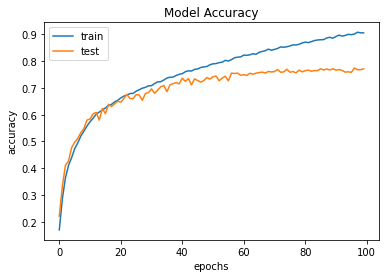

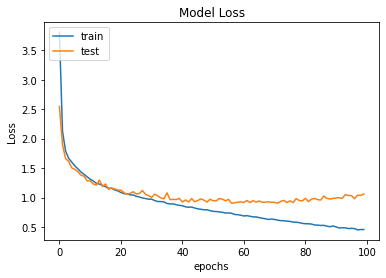

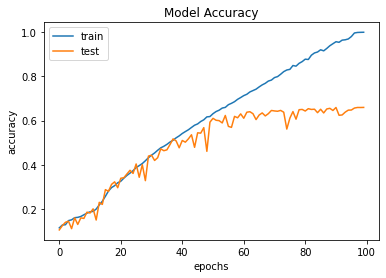

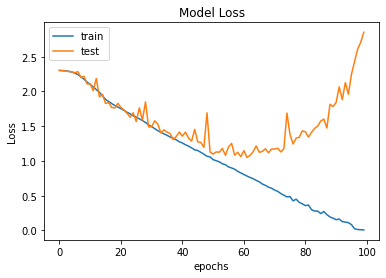

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history_old.history['accuracy'])
plt.plot(history_old.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_old.history['loss'])
plt.plot(history_old.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Homework
Do the same analysis for the accuracy and loss with and without regularization on CIFAR-100 dataset

In [ ]:
from keras.datasets import cifar100

(X_train_hw, Y_train_hw), (X_test_hw, Y_test_hw) = cifar100.load_data()

print('Train: X=%s, y=%s' % (X_train_hw.shape, Y_train_hw.shape))
print('Test: X=%s, y=%s' % (X_test_hw.shape, Y_test_hw.shape))

169017344/169001437 [==============================] - 11s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


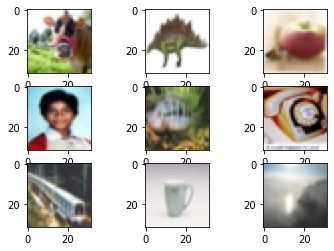

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train_hw[i])
plt.show()

In [ ]:
y_train_hw = tf.keras.utils.to_categorical(Y_train_hw)
y_test_hw = tf.keras.utils.to_categorical(Y_test_hw)
print(y_train_hw.shape)
print(y_test_hw.shape)
x_train_hw = X_train_hw/255.
x_test_hw = X_test_hw/255.
print(x_train_hw.shape)
print(x_test_hw.shape)

(50000, 100)
(10000, 100)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model_old_hw = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(100, activation='softmax')
])
model_old_hw.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_old_hw.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [ ]:
history_old = model_old_hw.fit(x_train_hw, y_train_hw, epochs=90, batch_size=256, validation_data=(x_test_hw, y_test_hw))

Epoch 1/90
196/196 [==============================] - 39s 39ms/step - loss: 4.0346 - accuracy: 0.0794 - val_loss: 3.5137 - val_accuracy: 0.1620
Epoch 2/90
196/196 [==============================] - 7s 36ms/step - loss: 3.2805 - accuracy: 0.2025 - val_loss: 3.1010 - val_accuracy: 0.2429
Epoch 3/90
196/196 [==============================] - 7s 36ms/step - loss: 2.8723 - accuracy: 0.2807 - val_loss: 2.7760 - val_accuracy: 0.3028
Epoch 4/90
196/196 [==============================] - 7s 36ms/step - loss: 2.5752 - accuracy: 0.3401 - val_loss: 2.5819 - val_accuracy: 0.3453
Epoch 5/90
196/196 [==============================] - 7s 36ms/step - loss: 2.3219 - accuracy: 0.3934 - val_loss: 2.4774 - val_accuracy: 0.3662
Epoch 6/90
196/196 [==============================] - 7s 36ms/step - loss: 2.1044 - accuracy: 0.4426 - val_loss: 2.3758 - val_accuracy: 0.3921
Epoch 7/90
196/196 [==============================] - 7s 36ms/step - loss: 1.8852 - accuracy: 0.4902 - val_loss: 2.3021 - val_accuracy: 0.409

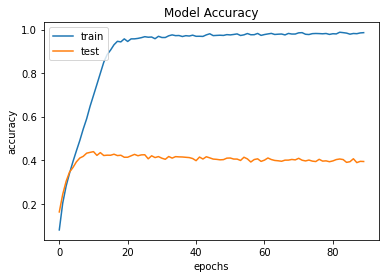

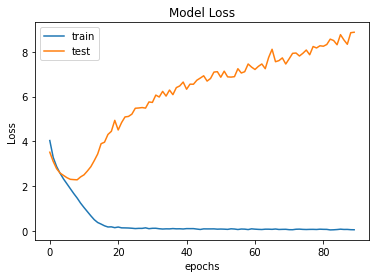

In [ ]:
plt.plot(history_old.history['accuracy'])
plt.plot(history_old.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_old.history['loss'])
plt.plot(history_old.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
model_hw = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.02)),
                             tf.keras.layers.Dropout(0.35),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.02)),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(100, activation='softmax')
])
model_hw.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_hw.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 256)         295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)             

In [ ]:
history=model_hw.fit(x_train_hw, y_train_hw, epochs=90, batch_size=256, validation_data=(x_test_hw, y_test_hw))

Epoch 1/90
196/196 [==============================] - 8s 39ms/step - loss: 7.4169 - accuracy: 0.0243 - val_loss: 4.2767 - val_accuracy: 0.0390
Epoch 2/90
196/196 [==============================] - 7s 37ms/step - loss: 4.2045 - accuracy: 0.0541 - val_loss: 4.0463 - val_accuracy: 0.0828
Epoch 3/90
196/196 [==============================] - 7s 37ms/step - loss: 4.0548 - accuracy: 0.0806 - val_loss: 3.9237 - val_accuracy: 0.1164
Epoch 4/90
196/196 [==============================] - 7s 37ms/step - loss: 3.9425 - accuracy: 0.1034 - val_loss: 3.8180 - val_accuracy: 0.1313
Epoch 5/90
196/196 [==============================] - 7s 37ms/step - loss: 3.8090 - accuracy: 0.1291 - val_loss: 3.6405 - val_accuracy: 0.1603
Epoch 6/90
196/196 [==============================] - 7s 37ms/step - loss: 3.7093 - accuracy: 0.1473 - val_loss: 3.5842 - val_accuracy: 0.1832
Epoch 7/90
196/196 [==============================] - 7s 37ms/step - loss: 3.6359 - accuracy: 0.1627 - val_loss: 3.5454 - val_accuracy: 0.1907

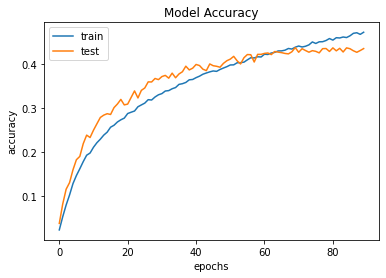

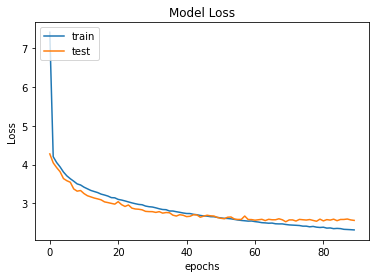

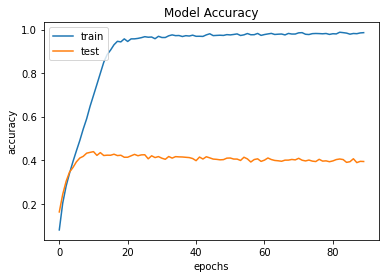

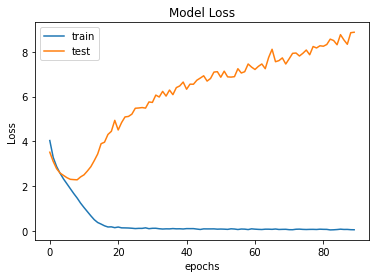

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history_old.history['accuracy'])
plt.plot(history_old.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_old.history['loss'])
plt.plot(history_old.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Another attempt below, with lower regularization - 

In [ ]:
model_hw = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Conv2D(128, (3, 3), padding='valid', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D((2, 2)),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                             tf.keras.layers.Dropout(0.28),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(100, activation='softmax')
])
model_hw.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_hw.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 256)         295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

In [ ]:
history=model_hw.fit(x_train_hw, y_train_hw, epochs=90, batch_size=256, validation_data=(x_test_hw, y_test_hw))

Epoch 1/90
196/196 [==============================] - 8s 39ms/step - loss: 5.9006 - accuracy: 0.0297 - val_loss: 4.2559 - val_accuracy: 0.0434
Epoch 2/90
196/196 [==============================] - 7s 37ms/step - loss: 4.1042 - accuracy: 0.0681 - val_loss: 3.9247 - val_accuracy: 0.1050
Epoch 3/90
196/196 [==============================] - 7s 37ms/step - loss: 3.8834 - accuracy: 0.1103 - val_loss: 3.7310 - val_accuracy: 0.1464
Epoch 4/90
196/196 [==============================] - 7s 37ms/step - loss: 3.6987 - accuracy: 0.1493 - val_loss: 3.7029 - val_accuracy: 0.1590
Epoch 5/90
196/196 [==============================] - 7s 37ms/step - loss: 3.5652 - accuracy: 0.1778 - val_loss: 3.4015 - val_accuracy: 0.2226
Epoch 6/90
196/196 [==============================] - 7s 37ms/step - loss: 3.4414 - accuracy: 0.2015 - val_loss: 3.3239 - val_accuracy: 0.2362
Epoch 7/90
196/196 [==============================] - 7s 37ms/step - loss: 3.3630 - accuracy: 0.2209 - val_loss: 3.2645 - val_accuracy: 0.2487

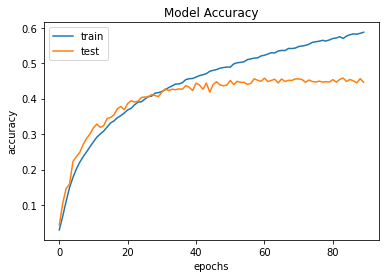

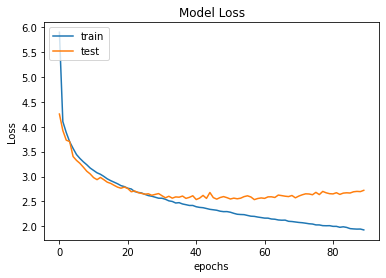

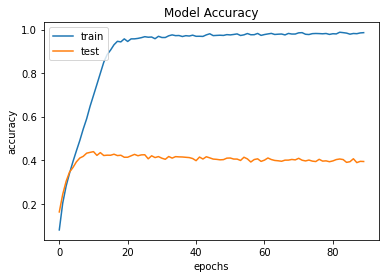

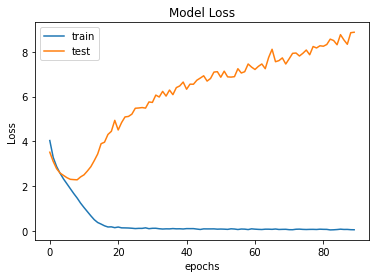

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history_old.history['accuracy'])
plt.plot(history_old.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_old.history['loss'])
plt.plot(history_old.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Since the regularization was marginally lower in the last attempt (as compared to the attempt before), it can be seen that towards the fag end of training, the model begins to overfit slightly (validation loss starts increasing marginally and the gap between training and validation performance has increased a lot).